In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data from excel
data = pd.read_excel('dset_test01234.xlsx',header=None)
#Converting dataframe to numpy array
data = np.array(data)

In [3]:
d = data[:,0:-1] #Features
l = data[:,-1]   #Label

#Creating training,validation and testing data
train_x, tdset_x, train_y, tdset_y = train_test_split(d,l,test_size=0.2)

valid_x, test_x, valid_y, test_y = train_test_split(tdset_x,tdset_y,test_size=0.5)

print(d.shape)
print(l.shape)
print(train_x.shape)
print(train_y.shape)
print(tdset_x.shape)
print(tdset_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_x.shape)
print(test_y.shape)


(1340, 12)
(1340,)
(1072, 12)
(1072,)
(268, 12)
(268,)
(134, 12)
(134,)
(134, 12)
(134,)


# NN

In [4]:
def nn_activation(x_train,y_train,x_test,y_test):
    error_rate = []
    activation = ['identity','logistic','tanh','relu']
    for i in activation:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,activation=i,learning_rate_init=0.001,
                                             max_iter=30000,shuffle=True)
        model.fit(x_train, y_train)
        print("Activation Function:",i)
        y_pred = model.predict(x_train)
        count=0
        for j in range(len(y_train)):
            if y_train[j] == y_pred[j]:
                count = count+1
        print("Accuracy on Training data:",(count/len(y_train)))
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
        print("Accuracy on Validation data:",(count/len(y_test)))
        
        
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at %s." % (error_rate[kloc], activation[kloc]))
    return activation[kloc]

In [5]:
def nn_hidden_layer(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=i,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [8]:
def nn_hidden_layer_2(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[30,35,40,45,50,55,60]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(45,i),activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [6]:
hidden_layer = nn_activation(train_x,train_y,valid_x,valid_y)

Activation Function: identity
Accuracy on Training data: 0.6492537313432836
Accuracy on Validation data: 0.6044776119402985
Activation Function: logistic
Accuracy on Training data: 0.6352611940298507
Accuracy on Validation data: 0.5447761194029851
Activation Function: tanh
Accuracy on Training data: 0.6539179104477612
Accuracy on Validation data: 0.6268656716417911
Activation Function: relu
Accuracy on Training data: 0.6875
Accuracy on Validation data: 0.7014925373134329
Max accuracy is 0.7014925373134329 occurs at relu.


Max accuracy is 0.6940298507462687 occurs at hidden layer size=45.


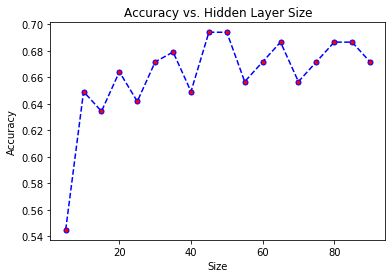

In [7]:
hidden_layer = nn_hidden_layer(train_x,train_y,valid_x,valid_y)

Max accuracy is 0.6791044776119403 occurs at hidden layer size=30.


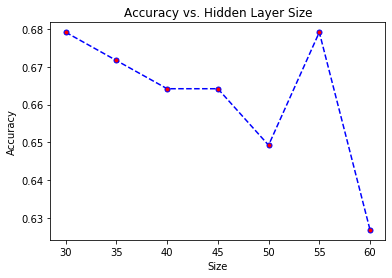

In [9]:
hidden_layer = nn_hidden_layer_2(train_x,train_y,valid_x,valid_y)

# Random Forrest

[ 95.98880597  95.52238806  97.57462687  98.13432836  98.78731343
  98.50746269  98.78731343  99.44029851  99.25373134  99.25373134
  99.72014925  99.81343284  99.81343284  99.72014925  99.81343284
  99.90671642 100.          99.62686567  99.90671642  99.81343284
  99.81343284 100.          99.72014925 100.          99.90671642
  99.90671642 100.          99.90671642  99.90671642 100.
 100.         100.         100.         100.         100.
 100.         100.          99.90671642 100.          99.90671642
 100.         100.         100.         100.         100.
 100.        ]
[62.68656716 67.91044776 58.95522388 64.17910448 63.43283582 65.67164179
 61.94029851 64.92537313 62.68656716 64.17910448 59.70149254 64.92537313
 68.65671642 70.14925373 68.65671642 60.44776119 67.1641791  69.40298507
 64.92537313 68.65671642 64.92537313 67.91044776 71.64179104 64.92537313
 69.40298507 67.1641791  63.43283582 68.65671642 64.92537313 67.91044776
 63.43283582 67.91044776 66.41791045 69.40298507 6

Text(0, 0.5, 'Accuracy [%]')

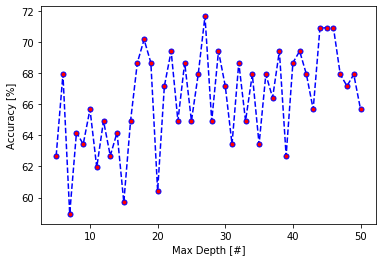

In [11]:
acc_train=[]
acc_test=[]
i=5
while i<=50:
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(5,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

# K Nearest Neighbour 

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100.]
[53.73134328 54.47761194 58.20895522 58.95522388 60.44776119 58.20895522
 59.70149254 59.70149254 61.19402985 61.19402985 61.94029851 61.19402985
 61.94029851 61.19402985 59.70149254 61.19402985 58.20895522 58.95522388
 58.95522388 60.44776119 56.71641791 60.44776119 58.20895522 58.95522388
 56.71641791 57.46268657 55.97014925 58.20895522 55.97014925 57.46268657
 55.97014925 54.47761194 54.47761194 57.46268657 56.71641791 60.44776119
 58.95522388 61.19402985 60.44776119 60.44776119 58.95522388 60.44776119
 58.20895522 60.44776119 58.95522388 59.70149254 58.20895522 59.70149254]


Text(0, 0.5, 'Accuracy [%]')

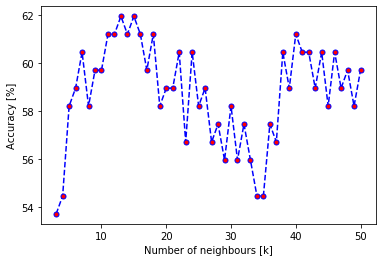

In [12]:
acc_train=[]
acc_test=[]
i=3
while i<=50:
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(3,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Number of neighbours [k]')
plt.ylabel('Accuracy [%]')

# Final Models

In [13]:
def classify(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    t_0 = 0
    t_1 = 0
    f_0 = 0
    f_1 = 0
    y_pred = model.predict(x_test)
    for i in range(len(y_test)):
        if y_test[i] == 0:
            if y_test[i]==y_pred[i]:
                t_0 = t_0+1
            else:
                f_1 = f_1+1
        elif y_test[i] == 1:
            if y_test[i] == y_pred[i]:
                t_1 = t_1+1
            else:
                f_0 = f_0+1
                
    print("Confusion Matrix:")            
    print("Predicted\Actual   Not Ghost    Ghost")
    print("Not Ghost          ",t_0,"        ",f_0)
    print("Ghost              ",f_1,"        ",t_1)
    print("Accuracy:",((t_0+t_1)/len(y_test)))
    print("Error Rate:",((f_0+f_1)/len(y_test)),"\n")
    print("Prediction of Not Ghost (clear) Fingerprints")
    print("-------------------")
    print("Precision:",(t_0/(t_0+f_0)))
    print("Recall:",(t_0/(t_0+f_1)),"\n")
    print("Prediction of Ghost Fingerprints")
    print("---------------------")
    print("Precision:",(t_1/(t_1+f_1)))
    print("Recall:",(t_1/(t_1+f_0)))

In [14]:
model_nn = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=80,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)

model_rf = RandomForestClassifier(n_estimators=25)

model_knn = KNeighborsClassifier(n_neighbors=9,weights='distance') 


In [15]:
classify(model_nn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           52          17
Ghost               24          41
Accuracy: 0.6940298507462687
Error Rate: 0.30597014925373134 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.7536231884057971
Recall: 0.6842105263157895 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.6307692307692307
Recall: 0.7068965517241379


In [39]:
classify(model_rf,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           52          24
Ghost               24          34
Accuracy: 0.6417910447761194
Error Rate: 0.3582089552238806 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.6842105263157895
Recall: 0.6842105263157895 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.5862068965517241
Recall: 0.5862068965517241


In [40]:
classify(model_knn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           44          21
Ghost               32          37
Accuracy: 0.6044776119402985
Error Rate: 0.39552238805970147 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.676923076923077
Recall: 0.5789473684210527 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.5362318840579711
Recall: 0.6379310344827587
